## Setup

In [4]:
import numpy as np
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [5]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Train the model

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('validation data shape : image - {0}, label - {1}'.format(x_validation.shape, y_validation.shape))

training data shape : image - (45000, 28, 28, 1), label - (45000, 10)
validation data shape : image - (15000, 28, 28, 1), label - (15000, 10)


AdaDelta Optimizer

In [10]:
epochs = 20
batch_size = 128

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_validation, y_validation))

Epoch 1/20
352/352 [==============================] - 9s 11ms/step - loss: 2.2912 - accuracy: 0.1619 - val_loss: 2.2637 - val_accuracy: 0.2793
Epoch 2/20
352/352 [==============================] - 3s 9ms/step - loss: 2.2493 - accuracy: 0.2469 - val_loss: 2.2164 - val_accuracy: 0.4011
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 2.2021 - accuracy: 0.3251 - val_loss: 2.1616 - val_accuracy: 0.4749
Epoch 4/20
352/352 [==============================] - 3s 9ms/step - loss: 2.1457 - accuracy: 0.3886 - val_loss: 2.0947 - val_accuracy: 0.5381
Epoch 5/20
352/352 [==============================] - 3s 9ms/step - loss: 2.0767 - accuracy: 0.4382 - val_loss: 2.0112 - val_accuracy: 0.5966
Epoch 6/20
352/352 [==============================] - 3s 9ms/step - loss: 1.9922 - accuracy: 0.4816 - val_loss: 1.9080 - val_accuracy: 0.6469
Epoch 7/20
352/352 [==============================] - 3s 9ms/step - loss: 1.8901 - accuracy: 0.5198 - val_loss: 1.7850 - val_accuracy: 0.6849
Epoch

## Evaluate the trained model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.594017505645752
Test accuracy: 0.8593999743461609


AdaDelta Optimizer 2

In [14]:
epochs = 20
batch_size = 128

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_validation, y_validation))

Epoch 1/20
352/352 [==============================] - 4s 10ms/step - loss: 0.0401 - accuracy: 0.9863 - val_loss: 0.0377 - val_accuracy: 0.9886
Epoch 2/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 4/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 5/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 6/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 7/20
352/352 [==============================] - 3s 9ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0366 - val_accuracy: 0.9893
Epoch

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.029014678671956062
Test accuracy: 0.989799976348877


# Change Optimizer

In [12]:
batch_size = 128
epochs = 15

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_validation, y_validation))

Epoch 1/15
352/352 [==============================] - 4s 10ms/step - loss: 0.3904 - accuracy: 0.8815 - val_loss: 0.1539 - val_accuracy: 0.9545
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 0.2007 - accuracy: 0.9399 - val_loss: 0.0969 - val_accuracy: 0.9701
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 0.1412 - accuracy: 0.9584 - val_loss: 0.0726 - val_accuracy: 0.9764
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 0.1115 - accuracy: 0.9663 - val_loss: 0.0628 - val_accuracy: 0.9807
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0974 - accuracy: 0.9703 - val_loss: 0.0552 - val_accuracy: 0.9822
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0843 - accuracy: 0.9735 - val_loss: 0.0526 - val_accuracy: 0.9837
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.0474 - val_accuracy: 0.9857
Epoch

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.030975928530097008
Test accuracy: 0.9896000027656555


SGD 2

In [16]:
batch_size = 128
epochs = 15

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(x_validation, y_validation))

Epoch 1/15
352/352 [==============================] - 4s 10ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0326 - accuracy: 0.9888 - val_loss: 0.0377 - val_accuracy: 0.9899
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0376 - val_accuracy: 0.9891
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0373 - val_accuracy: 0.9891
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.031017828732728958
Test accuracy: 0.989799976348877


NameError: name 'history' is not defined

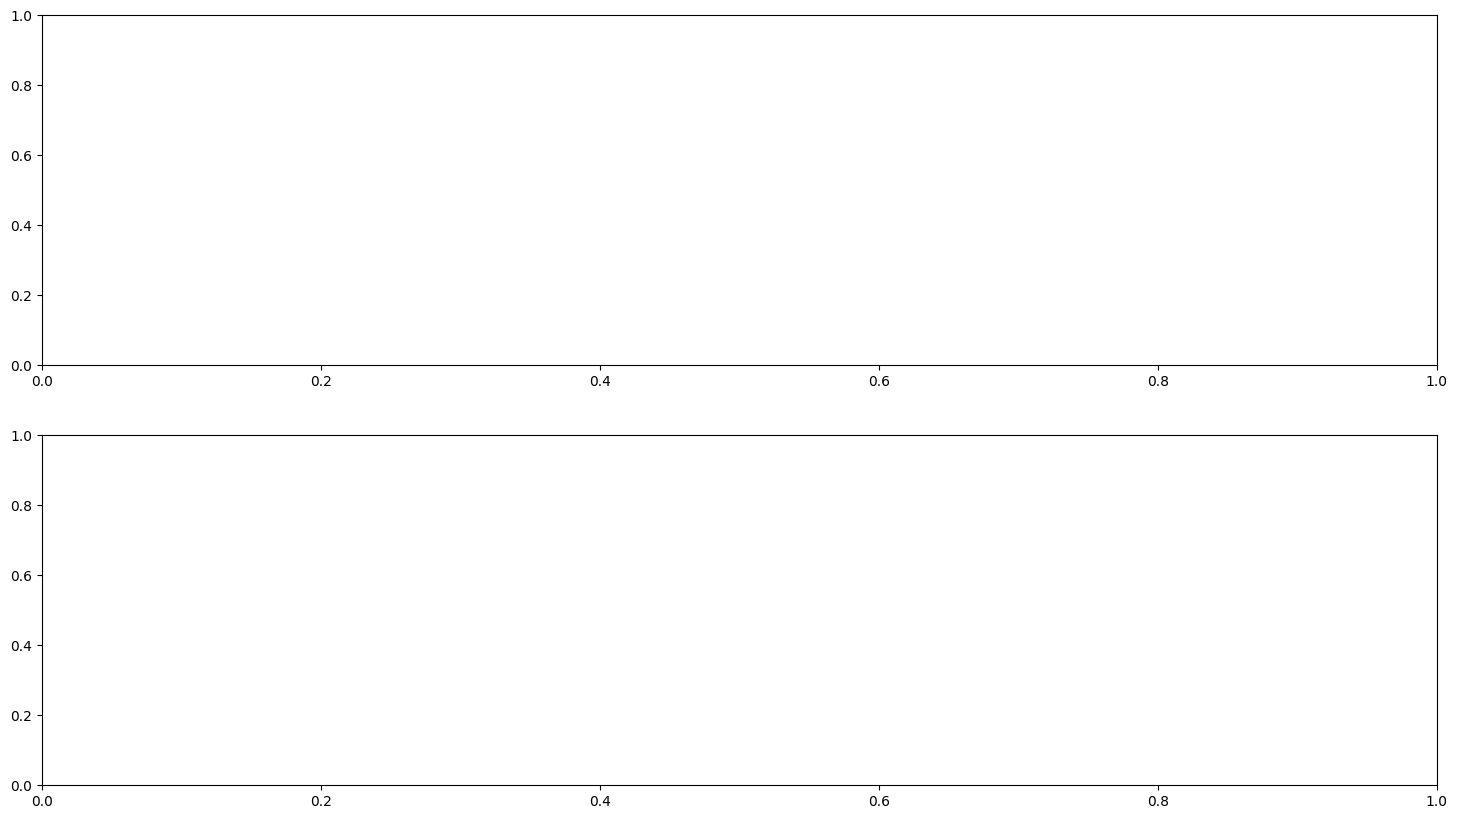

In [20]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)